# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on


Import the pandas module.


In [1]:
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import numpy as np  # useful for many scientific computing in Python

Load the dataset into a dataframe.


In [2]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df = pd.read_csv("survey_data_clean.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0


In [3]:
df.shape

(11398, 86)

In [4]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000,1.058900e+04
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895,6.170771e+06
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686,9.842866e+07
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000,0.000000e+00
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000,5.200000e+04
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000,1.000000e+05
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000,3.600000e+05
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000,8.400000e+09


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
df[['ConvertedComp']].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


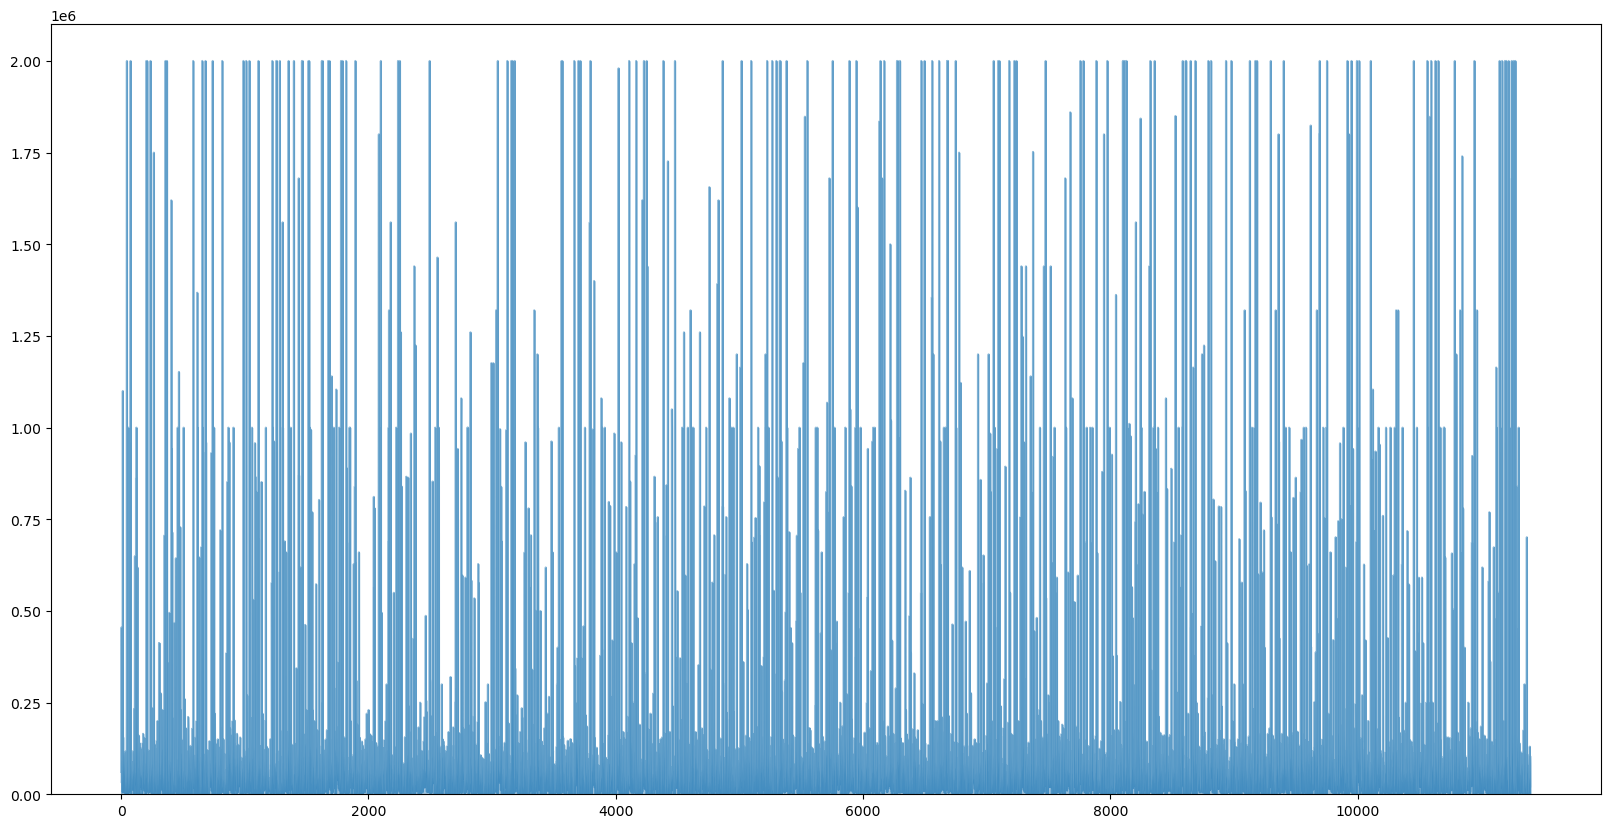

In [6]:
df['ConvertedComp'].plot(kind='area', alpha=0.45,stacked=False, figsize=(20, 10))
plt.show()

Plot the histogram for the column `ConvertedComp`.


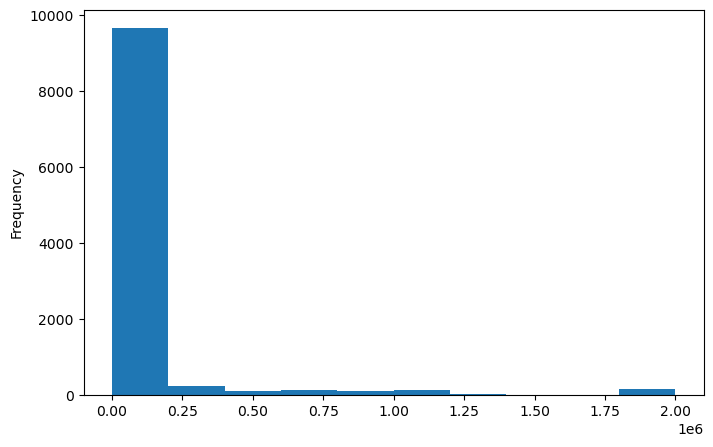

In [7]:

# np.histogram returns 2 values
#count, bin_edges = np.histogram(df['ConvertedComp'])

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5)) #,  xticks=bin_edges)

#plt.title('Histogram of ConvertedComp') # add a title to the histogram
#plt.ylabel('Number of Countries') # add y-label
#plt.xlabel('Number of Immigrants') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [9]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
df[['ConvertedComp','Gender']].groupby('Gender').median()

,ConvertedComp
Gender,
Man,57744.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",67142.0
Woman,57708.0
Woman;Man,21648.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


In [11]:
df[['Age']].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


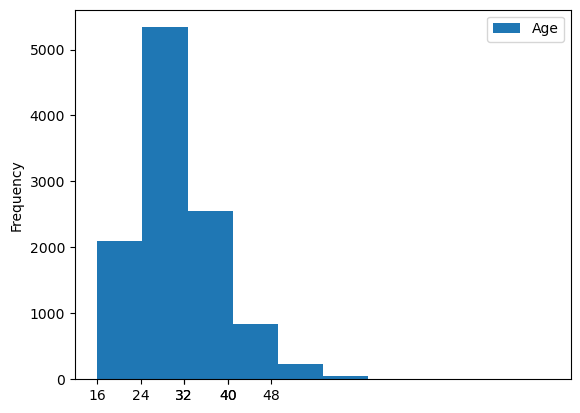

In [12]:
bin_edge = [16,24,32,40,48,32,40]
df[['Age']].plot(kind = 'hist',xticks = bin_edge)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


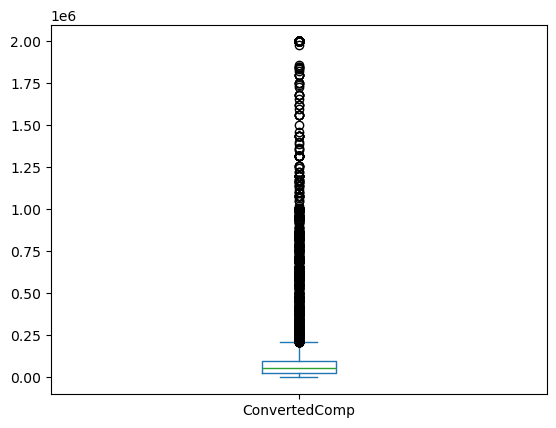

In [13]:
df['ConvertedComp'].plot(kind = 'box')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [15]:
countV,meanV,stdV ,minV ,q1,q2,q3, maxV = df['ConvertedComp'].describe()
iqr = q3-q1
print('Inter Quartile Range for the column `ConvertedComp`', iqr)

Inter Quartile Range for the column `ConvertedComp` 73132.0


In [16]:
print('Median of ConvertedComp ',q2)

Median of ConvertedComp  57745.0


Find out the upper and lower bounds.


In [17]:
LowerB = q1 - iqr *1.5
UpperB = q3 + iqr *1.5
print('Upper Bounds', UpperB)
print('Lower Bounds', LowerB)

Upper Bounds 209698.0
Lower Bounds -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [18]:
df[df['ConvertedComp']>UpperB].shape[0]

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
new_df = df[df['ConvertedComp']<UpperB]

In [20]:
countV,meanV,stdV ,minV ,q1,q2,q3, maxV = new_df['ConvertedComp'].describe()
print('Median of ConvertedComp removing the outliers ',q2)

Median of ConvertedComp removing the outliers  52704.0


In [21]:
print('Mean of ConvertedComp removing the outliers ',meanV)

Mean of ConvertedComp removing the outliers  59883.20838915799


### Age Outliner

In [22]:
countV,meanV,stdV ,minV ,q1,q2,q3, maxV = df['Age'].describe()
iqr = q3-q1
LowerB = q1 - iqr *1.5
UpperB = q3 + iqr *1.5

df[df['Age']<LowerB].shape[0]

0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
new_df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180,0.001313
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337,0.703651
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,-0.086286
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032,0.009938
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878,0.039096
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000,-0.016299
NormalizedAnnualCompensation,0.001313,0.703651,-0.086286,0.009938,0.039096,-0.016299,1.000000


Rav Ahuja


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
